In [0]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data2 = pd.read_csv("test.csv")
data1 = pd.read_csv("train.csv")
data1

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


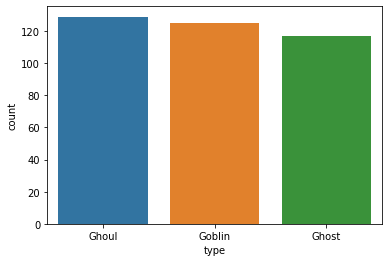

In [0]:
sns.countplot(x='type', data=data1)
#é notável que a quantidade de cada monstro é equilibrada, porém o monstro que mais aparece são ghouls

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


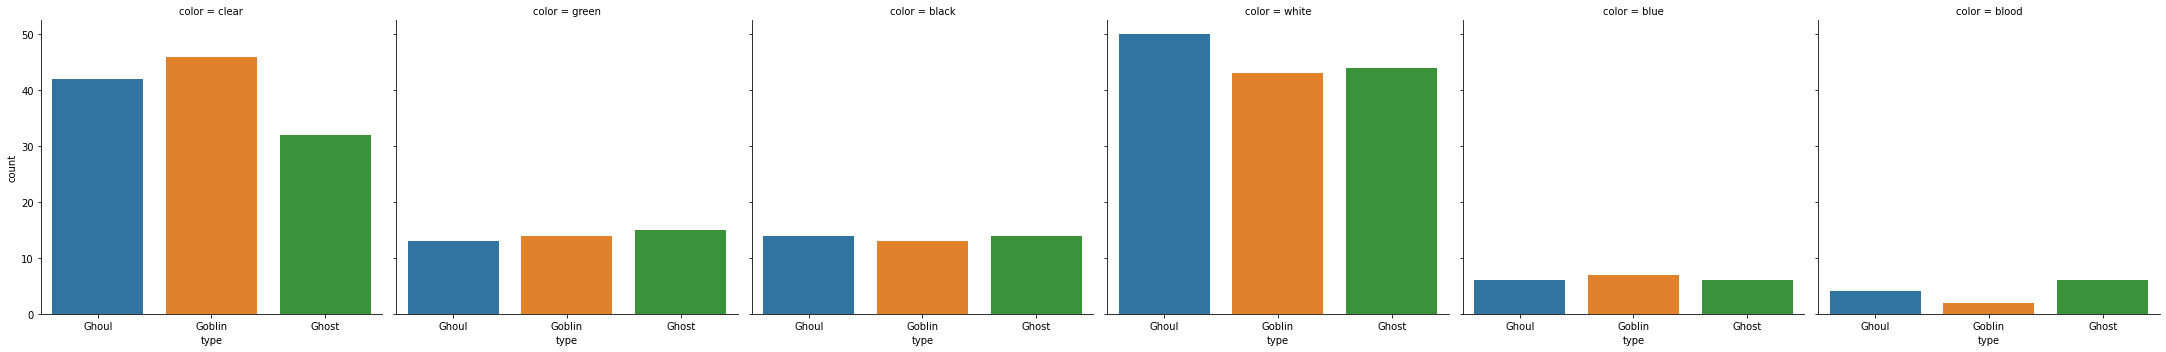

In [0]:
sns.factorplot(x='type', col='color', kind='count', data=data1)
#a partir desses gráficosse torna nítido como não podemos definir um monstro por cor

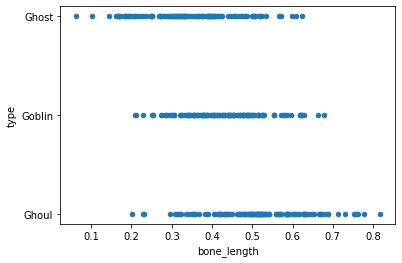

In [0]:
data1.plot.scatter(x='bone_length', y='type')
#atraves desse grafico vemos que todos os monstros com menos de 0,2 de bone_length são fantasmas
#também é notável que todos os monstros com mais de 0,7 de bone_length são canibais

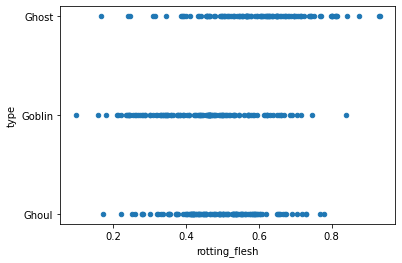

In [0]:
data1.plot.scatter(x='rotting_flesh', y='type') 
#atraves desse grafico vemos que todos os monstros com menos de 0,15 de rooting flesh são goblins
#também é notável que todos os monstros com mais de 0,85 de bone_length são fantasmas

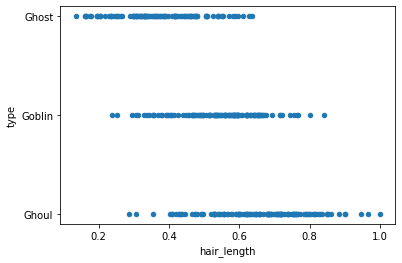

In [0]:
data1.plot.scatter(x='hair_length', y='type')
#atraves desse grafico vemos que todos os monstros com menos de 0,2 de hair length são fantasmas
#também é notável que todos os monstros com mais de 0,85 de hair length são canibais

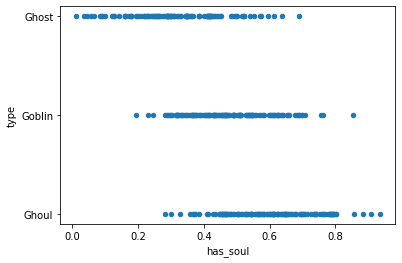

In [0]:
data1.plot.scatter(x='has_soul', y='type')
#atraves desse grafico vemos que todos os monstros com menos de 0,15 de has_soul são fantasmas
#também é notável que todos os monstros com mais de 0,85 de has_soul são canibais

In [0]:
from google.colab import files
data2['type']= 'Ghoul'
#monstro que mais aparece

#dados sobre o tamanho do osso
data2_length = data2[data2.bone_length<0.2]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghost'

data2_length = data2[data2.bone_length>0.7]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghoul'

#dados sobre a carne podre
data2_length = data2[data2.rotting_flesh<0.15]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Goblin'

data2_length = data2[data2.rotting_flesh>0.85]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghost'

#dados sobre o tamanho do cabelo
data2_length = data2[data2.hair_length<0.2]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghost'

data2_length = data2[data2.hair_length>0.85]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghoul'

#dados sobre a quantidade de alma
data2_length = data2[data2.has_soul<0.15]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghost'

data2_length = data2[data2.has_soul>0.85]
data2_length_ids = data2_length['id'].tolist()
data2.loc[data2['id'].isin(data2_length_ids), 'type'] = 'Ghoul'

data2.loc[:,['id', 'type']].to_csv('ggg_test.csv', index = False)
#files.download('ggg_test.csv')

data2

In [0]:
ggg = pd.read_csv("ggg_test.csv")
ggg

,id,type
0,3,Ghoul
1,6,Ghoul
2,9,Ghoul
3,10,Ghoul
4,13,Ghoul
...,...,...
524,893,Ghoul
525,894,Ghost
526,895,Ghoul
527,898,Ghoul


#Regressão Logística - Classificação


In [0]:

from sklearn.tree import DecisionTreeClassifier       # 1. Escolha do modelo.
model_tree = DecisionTreeClassifier()                 # 2. Escolha dos hiperparâmetros e intanciação.

In [0]:
#Feature Matrix
x_ggg = data1.loc[: ,  ["bone_length",	"rotting_flesh", "hair_length",	"has_soul"	] ]
x_ggg.head()

,bone_length,rotting_flesh,hair_length,has_soul
0,0.354512,0.350839,0.465761,0.781142
1,0.575560,0.425868,0.531401,0.439899
2,0.467875,0.354330,0.811616,0.791225
3,0.776652,0.508723,0.636766,0.884464
4,0.566117,0.875862,0.418594,0.636438


In [0]:
#Target Array
y_ggg = data1.type
y_ggg.head()

0     Ghoul
1    Goblin
2     Ghoul
3     Ghoul
4     Ghost
Name: type, dtype: object

In [0]:
#Separação do Banco de Dados
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_ggg, y_ggg, random_state=2020)

In [0]:
# Ajuste o modelo aos dados *
model_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#Faça predições em dados novos *
y_model_tree = model_tree.predict(xtest)

In [0]:
y_model_tree

array(['Goblin', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul',
       'Ghoul', 'Goblin', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin',
       'Goblin', 'Ghost', 'Ghost', 'Ghoul', 'Goblin', 'Ghost', 'Ghoul',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghost', 'Goblin', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin', 'Ghost',
       'Ghost', 'Ghoul', 'Ghoul', 'Ghost', 'Goblin', 'Ghoul', 'Ghost',
       'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Ghoul', 'Ghoul', 'Ghost',
       'Goblin', 'Ghoul', 'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Ghoul', 'Ghost', 'Goblin', 'Ghoul', 'Goblin',
       'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghost', 'Ghoul', 'Ghost',
       'Goblin', 'Goblin', 'Ghost', 'Ghoul', 'Ghost', 'Goblin', 'Goblin',
       'Ghost', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Ghost',
       'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghost', 'Ghost', 'Ghost',
       'Ghoul', 'Goblin'], dtype=object)

In [0]:
#SCORE ESPERADDO ATRAVES DO TREINO
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model_tree)

0.7311827956989247

#Análise dos Resultados (matriz de confusão) - Decision Tree

In [0]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model_tree)

Text(83.40000000000006, 0.5, 'Valores Reais')

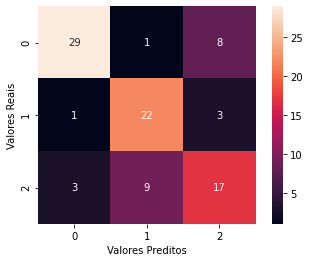

In [0]:
import matplotlib.pyplot as plt

sns.heatmap(mat, square = True, annot = True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
#Ex: 0 = Ghosts ; 1 = Goblin ; 2= Ghoul.